## Data Visualization

## Task 1: Matplotlib Basics with Superstore Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/Users/DELL/Downloads/Sample - Superstore.csv.zip', encoding='cp1252')

### 1. Line Plot Example

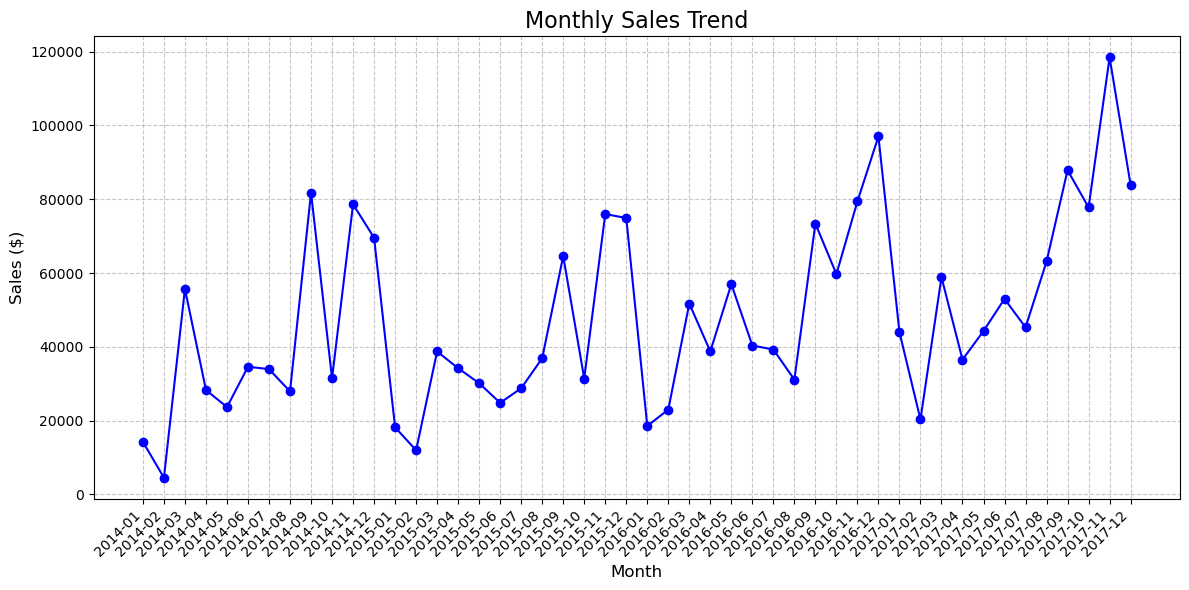

In [4]:
# Convert Order Date to datetime and extract year-month
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['YearMonth'] = df['Order Date'].dt.to_period('M')

# Group by month and sum sales
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

# Create line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Sales'], 
         marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the figure
plt.savefig('figure1.png', dpi=300)
plt.show()

### 2. Scatter Plot Example

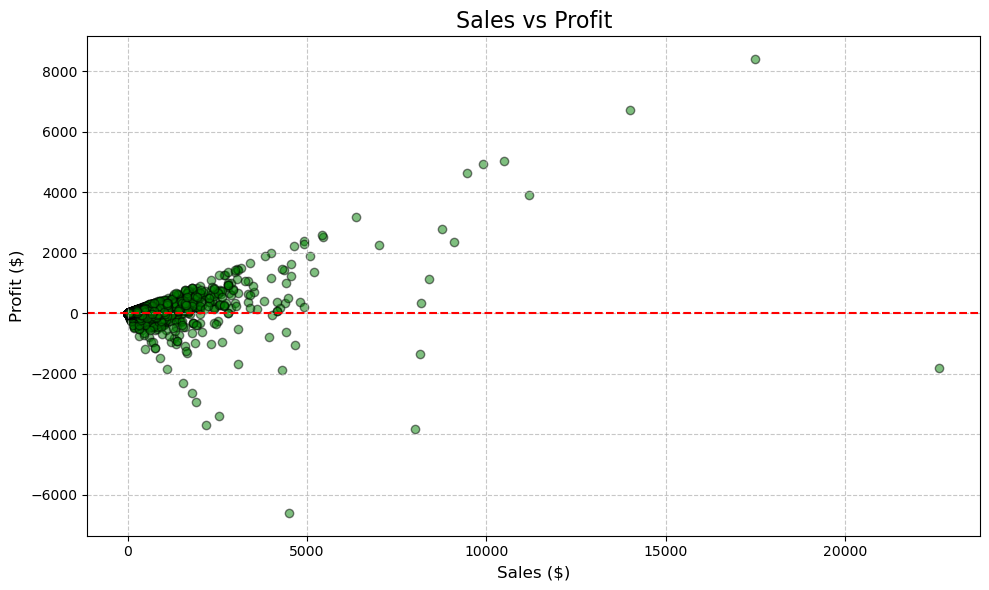

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'], df['Profit'], 
            alpha=0.5, color='green', edgecolors='black')
plt.title('Sales vs Profit', fontsize=16)
plt.xlabel('Sales ($)', fontsize=12)
plt.ylabel('Profit ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add a reference line for zero profit
plt.axhline(y=0, color='red', linestyle='--')

plt.tight_layout()

# Save the figure
plt.savefig('figure2.png', dpi=300)
plt.show()

## Task 2: Plot Customization with Matplotlib

### 1. Enhanced Line Plot with Customizations

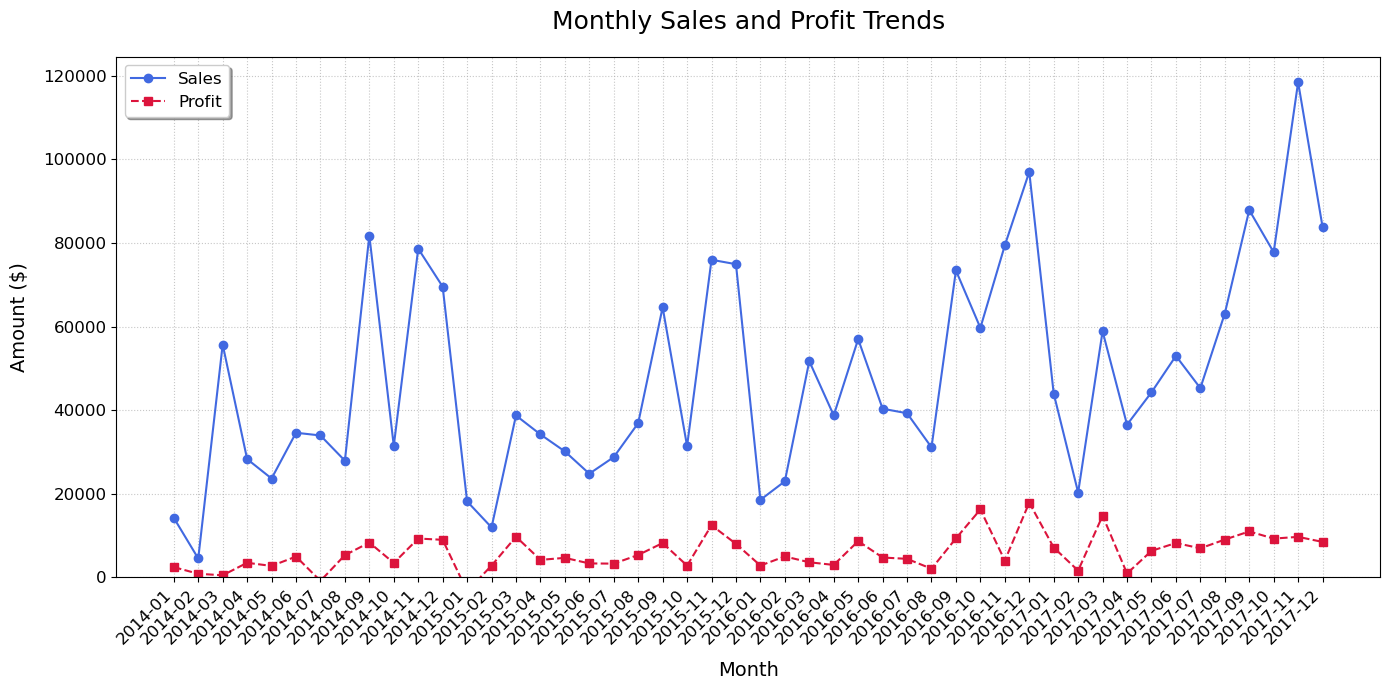

In [6]:
# Prepare data - monthly sales and profits
monthly_data = df.groupby('YearMonth').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
monthly_data['YearMonth'] = monthly_data['YearMonth'].astype(str)

# Create figure with custom size
plt.figure(figsize=(14, 7))

# Plot both sales and profit
plt.plot(monthly_data['YearMonth'], monthly_data['Sales'], 
         marker='o', linestyle='-', color='royalblue', label='Sales')
plt.plot(monthly_data['YearMonth'], monthly_data['Profit'], 
         marker='s', linestyle='--', color='crimson', label='Profit')

# Customizations
plt.title('Monthly Sales and Profit Trends', fontsize=18, pad=20)
plt.xlabel('Month', fontsize=14, labelpad=10)
plt.ylabel('Amount ($)', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=12, framealpha=1, shadow=True)

# Add grid
plt.grid(True, linestyle=':', alpha=0.7)

# Set axis limits if needed
plt.ylim(bottom=0)  # Ensure y-axis starts at 0

# Adjust layout and save
plt.tight_layout()
plt.savefig('custom_lineplot.png', dpi=300, bbox_inches='tight')
plt.show()

### 2. Enhanced Scatter Plot with Customizations

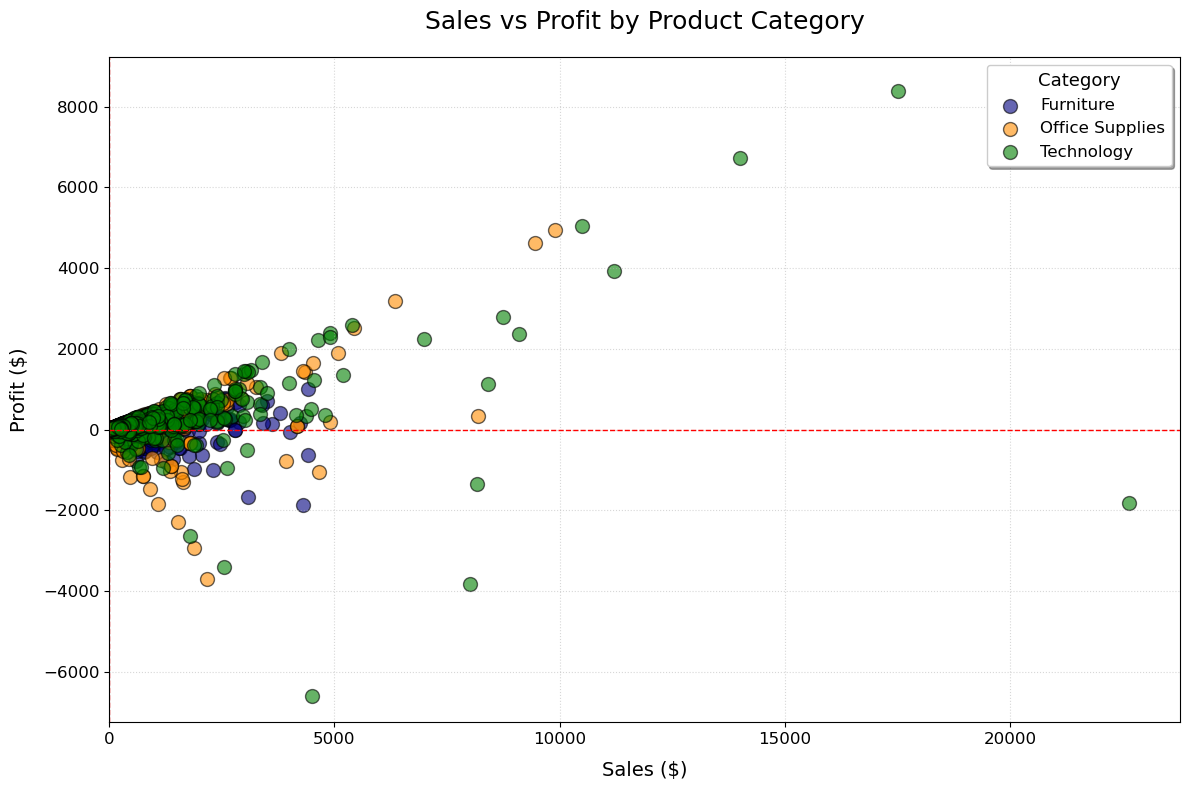

In [7]:
# Create figure with custom size
plt.figure(figsize=(12, 8))

# Create scatter plot with category differentiation
categories = df['Category'].unique()
colors = ['navy', 'darkorange', 'green']

for category, color in zip(categories, colors):
    subset = df[df['Category'] == category]
    plt.scatter(subset['Sales'], subset['Profit'], 
               alpha=0.6, color=color, edgecolor='black',
               s=100, label=category)

# Customizations
plt.title('Sales vs Profit by Product Category', fontsize=18, pad=20)
plt.xlabel('Sales ($)', fontsize=14, labelpad=10)
plt.ylabel('Profit ($)', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=12, title='Category', title_fontsize=13,
           framealpha=1, shadow=True)

# Add reference lines
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)

# Add grid
plt.grid(True, linestyle=':', alpha=0.5)

# Set axis limits
plt.xlim(left=0)
plt.ylim(bottom=df['Profit'].min()*1.1, top=df['Profit'].max()*1.1)

# Adjust layout and save
plt.tight_layout()
plt.savefig('custom_scatterplot.png', dpi=300, bbox_inches='tight')
plt.show()

## Task 3: Seaborn Introduction

### 1. Boxplot for Outlier Detection

C:\Users\DELL\AppData\Local\Temp\ipykernel_10804\4260131255.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='Sales', palette='Set2')


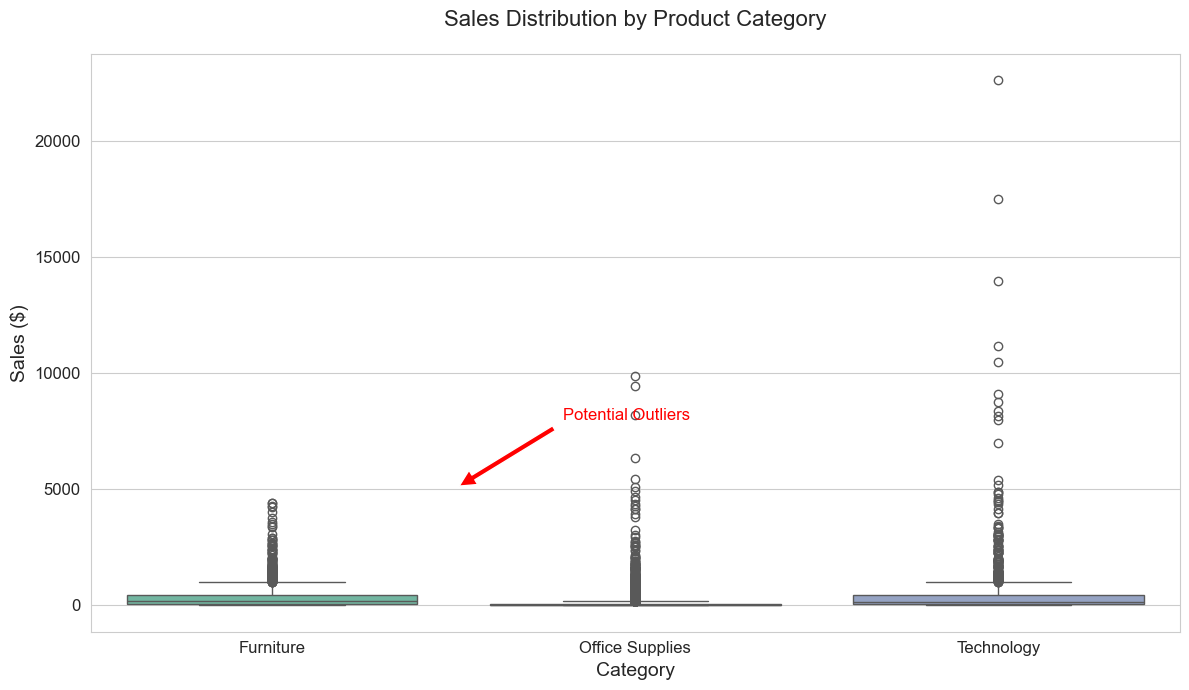

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("whitegrid")

# Create a boxplot for sales by category
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Category', y='Sales', palette='Set2')

# Customizations
plt.title('Sales Distribution by Product Category', fontsize=16, pad=20)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Sales ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Highlight potential outliers
plt.annotate('Potential Outliers', xy=(0.5, 5000), xytext=(0.8, 8000),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

plt.tight_layout()
plt.savefig('seaborn_boxplot.png', dpi=300)
plt.show()

### 2. Heatmap for Correlation Visualization

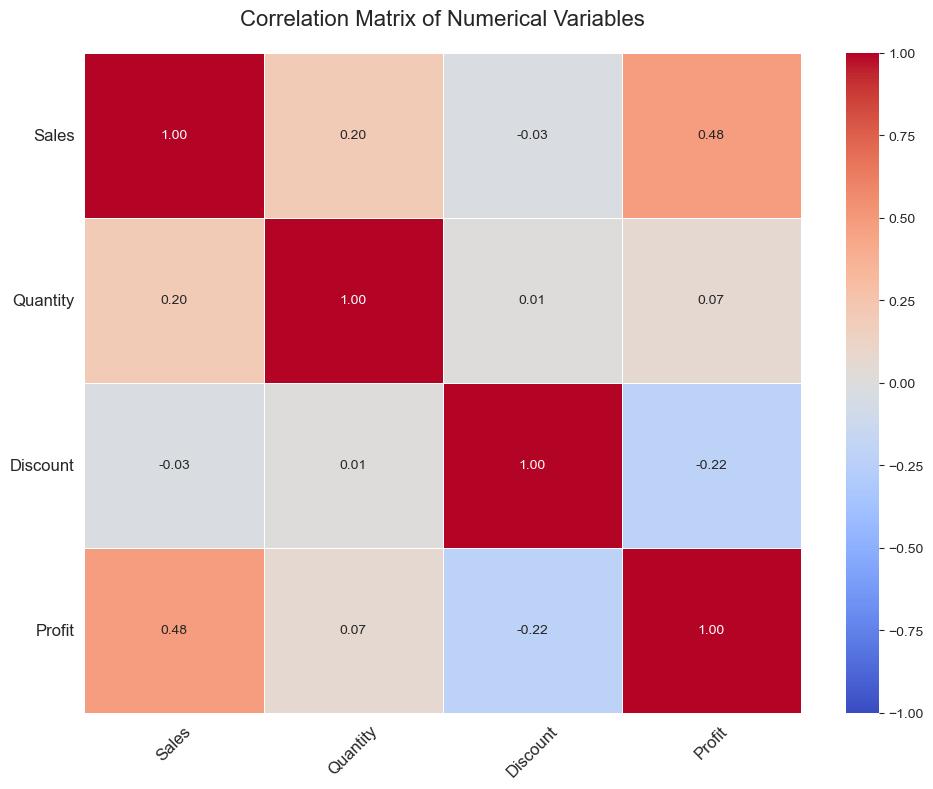

In [9]:
# Calculate correlation matrix
numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
corr_matrix = df[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', 
            fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

# Customizations
plt.title('Correlation Matrix of Numerical Variables', fontsize=16, pad=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)

plt.tight_layout()
plt.savefig('seaborn_heatmap.png', dpi=300)
plt.show()

### 3. Histogram with Kernel Density Estimation (KDE)

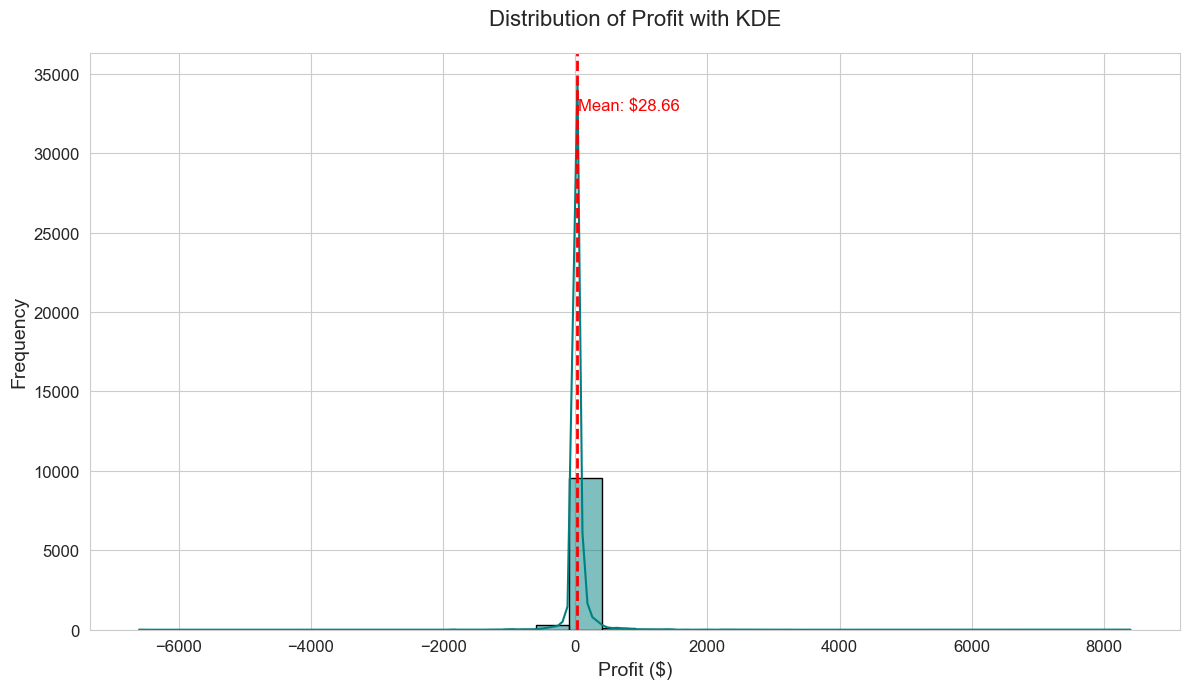

In [11]:
# Create histogram with KDE
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Profit', bins=30, kde=True, 
             color='teal', edgecolor='black')

# Customizations
plt.title('Distribution of Profit with KDE', fontsize=16, pad=20)
plt.xlabel('Profit ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add vertical line at mean
mean_profit = df['Profit'].mean()
plt.axvline(mean_profit, color='red', linestyle='--', linewidth=2)
plt.text(mean_profit+5, plt.ylim()[1]*0.9, 
         f'Mean: ${mean_profit:.2f}', 
         color='red', fontsize=12)

plt.tight_layout()
plt.savefig('seaborn_histplot.png', dpi=300)
plt.show()

## Task 4: Superstore Sales Analysis Visualization Project

In [13]:
from matplotlib.ticker import FuncFormatter

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)
df['Year'] = df['Order Date'].dt.year

# Format large numbers for readability
def millions(x, pos):
    return f'${x/1e6:,.1f}M'
millions_format = FuncFormatter(millions)

### 1. Histogram: Distribution of Sales

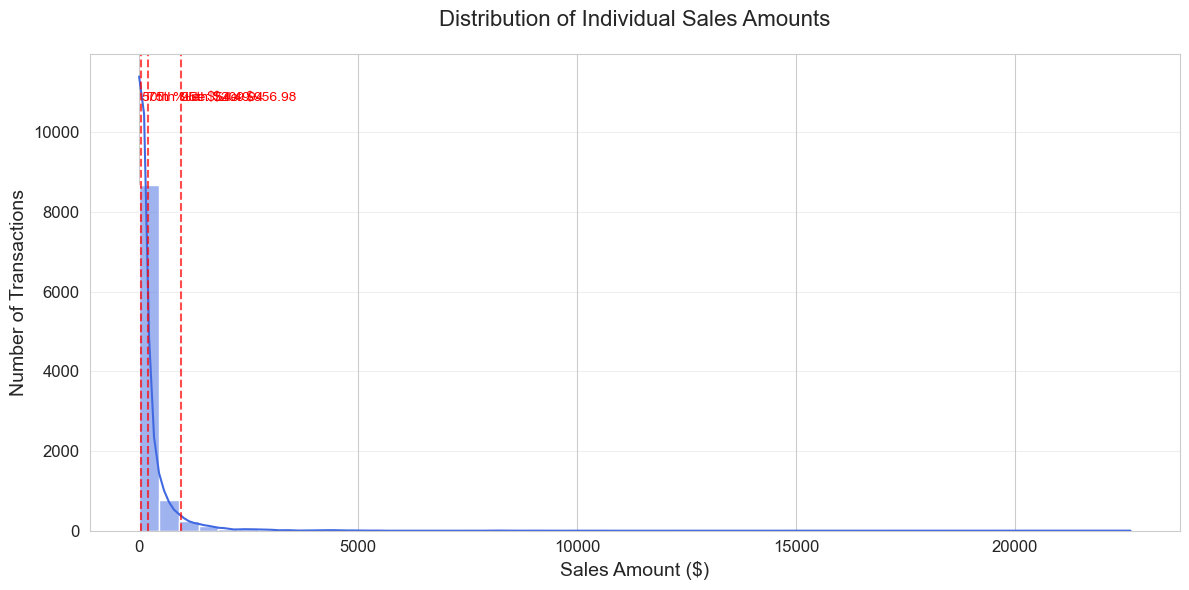

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Sales', bins=50, color='royalblue', 
             kde=True, edgecolor='white')

# Customizations
plt.title('Distribution of Individual Sales Amounts', fontsize=16, pad=20)
plt.xlabel('Sales Amount ($)', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Highlight key percentiles
for p in [50, 75, 95]:
    percentile = df['Sales'].quantile(p/100)
    plt.axvline(percentile, color='red', linestyle='--', alpha=0.7)
    plt.text(percentile+5, plt.ylim()[1]*0.9, 
             f'{p}th %ile: ${percentile:.2f}',
             color='red', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('sales_distribution.png', dpi=300)
plt.show()

### 2. Line Plot: Monthly Sales Trends by Category

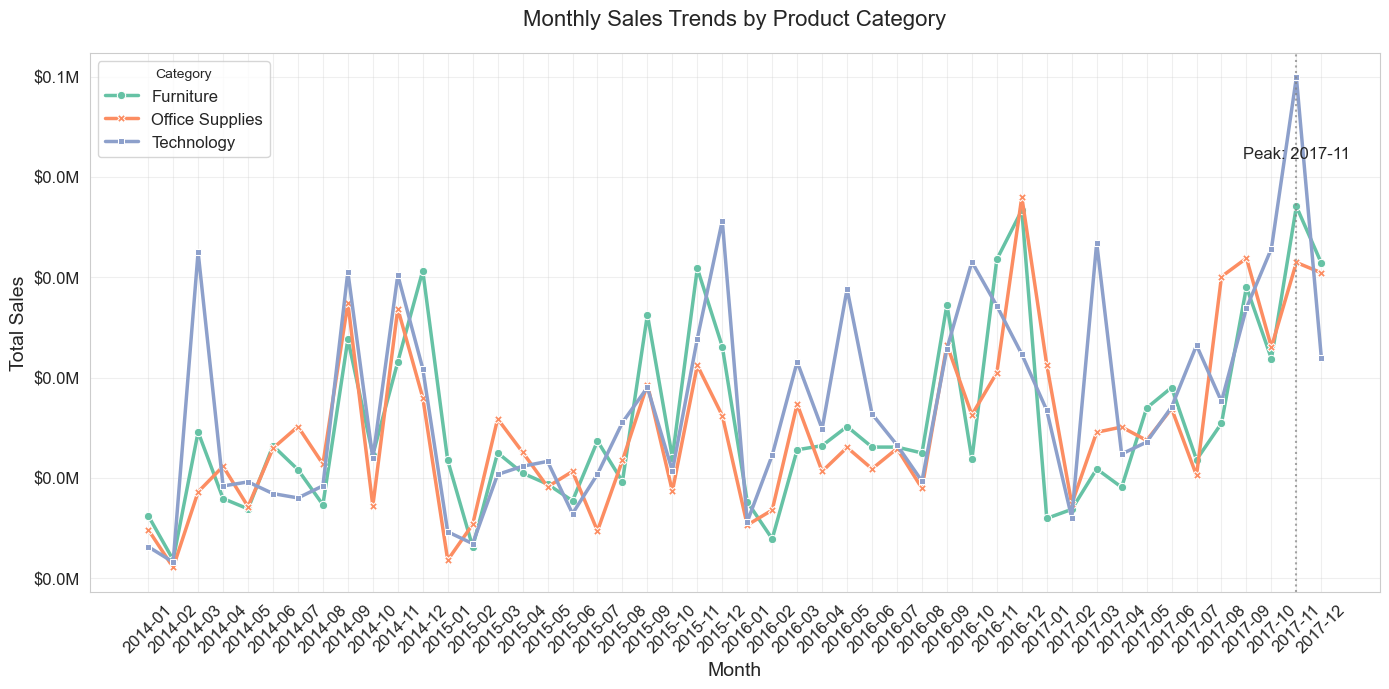

In [15]:
# Prepare monthly sales by category
monthly_category = df.groupby(['YearMonth', 'Category'])['Sales'].sum().unstack()

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_category, markers=True, dashes=False, 
             palette='Set2', linewidth=2.5)

# Customizations
plt.title('Monthly Sales Trends by Product Category', fontsize=16, pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(millions_format)

# Highlight peak months
max_month = monthly_category.sum(axis=1).idxmax()
plt.axvline(x=max_month, color='gray', linestyle=':', alpha=0.7)
plt.text(max_month, plt.ylim()[1]*0.8, f'Peak: {max_month}',
         ha='center', fontsize=12)

plt.grid(alpha=0.3)
plt.legend(title='Category', fontsize=12)
plt.tight_layout()
plt.savefig('monthly_trends.png', dpi=300)
plt.show()

### 3. Category Comparison: Profit Margin by Sub-Category

C:\Users\DELL\AppData\Local\Temp\ipykernel_10804\2290172515.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subcat_stats.reset_index(),


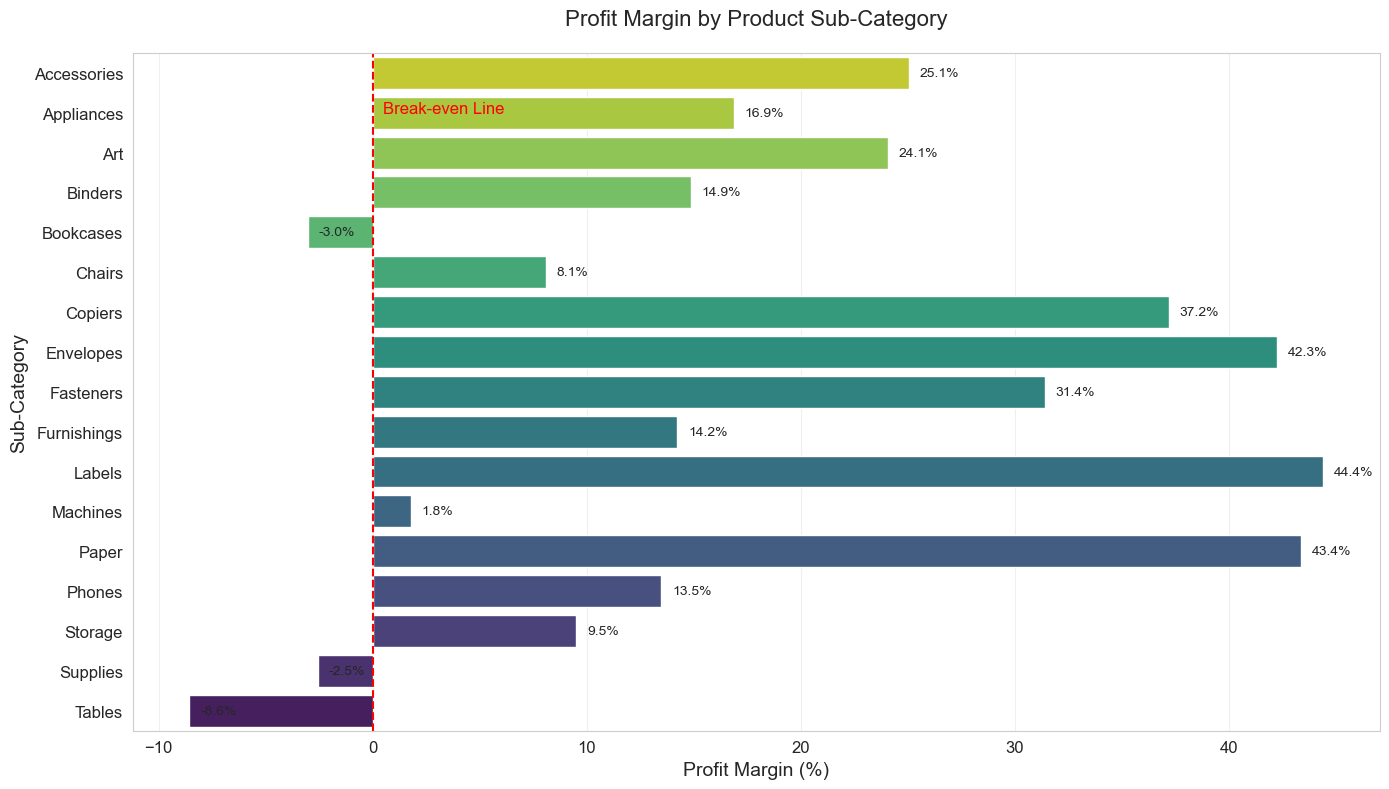

In [16]:
# Calculate profit margin by sub-category
subcat_stats = df.groupby('Sub-Category').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).assign(Profit_Margin=lambda x: x['Total_Profit']/x['Total_Sales']*100)

plt.figure(figsize=(14, 8))
sns.barplot(data=subcat_stats.reset_index(), 
            x='Profit_Margin', y='Sub-Category',
            palette='viridis_r')

# Customizations
plt.title('Profit Margin by Product Sub-Category', fontsize=16, pad=20)
plt.xlabel('Profit Margin (%)', fontsize=14)
plt.ylabel('Sub-Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add value labels
for i, margin in enumerate(subcat_stats['Profit_Margin']):
    plt.text(margin+0.5, i, f'{margin:.1f}%', 
             va='center', fontsize=10)

# Highlight negative margins
plt.axvline(0, color='red', linestyle='--')
plt.text(0.5, 1, 'Break-even Line', 
         color='red', fontsize=12)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('profit_margins.png', dpi=300)
plt.show()

## Task 5: Produce Publish-Quality Figures

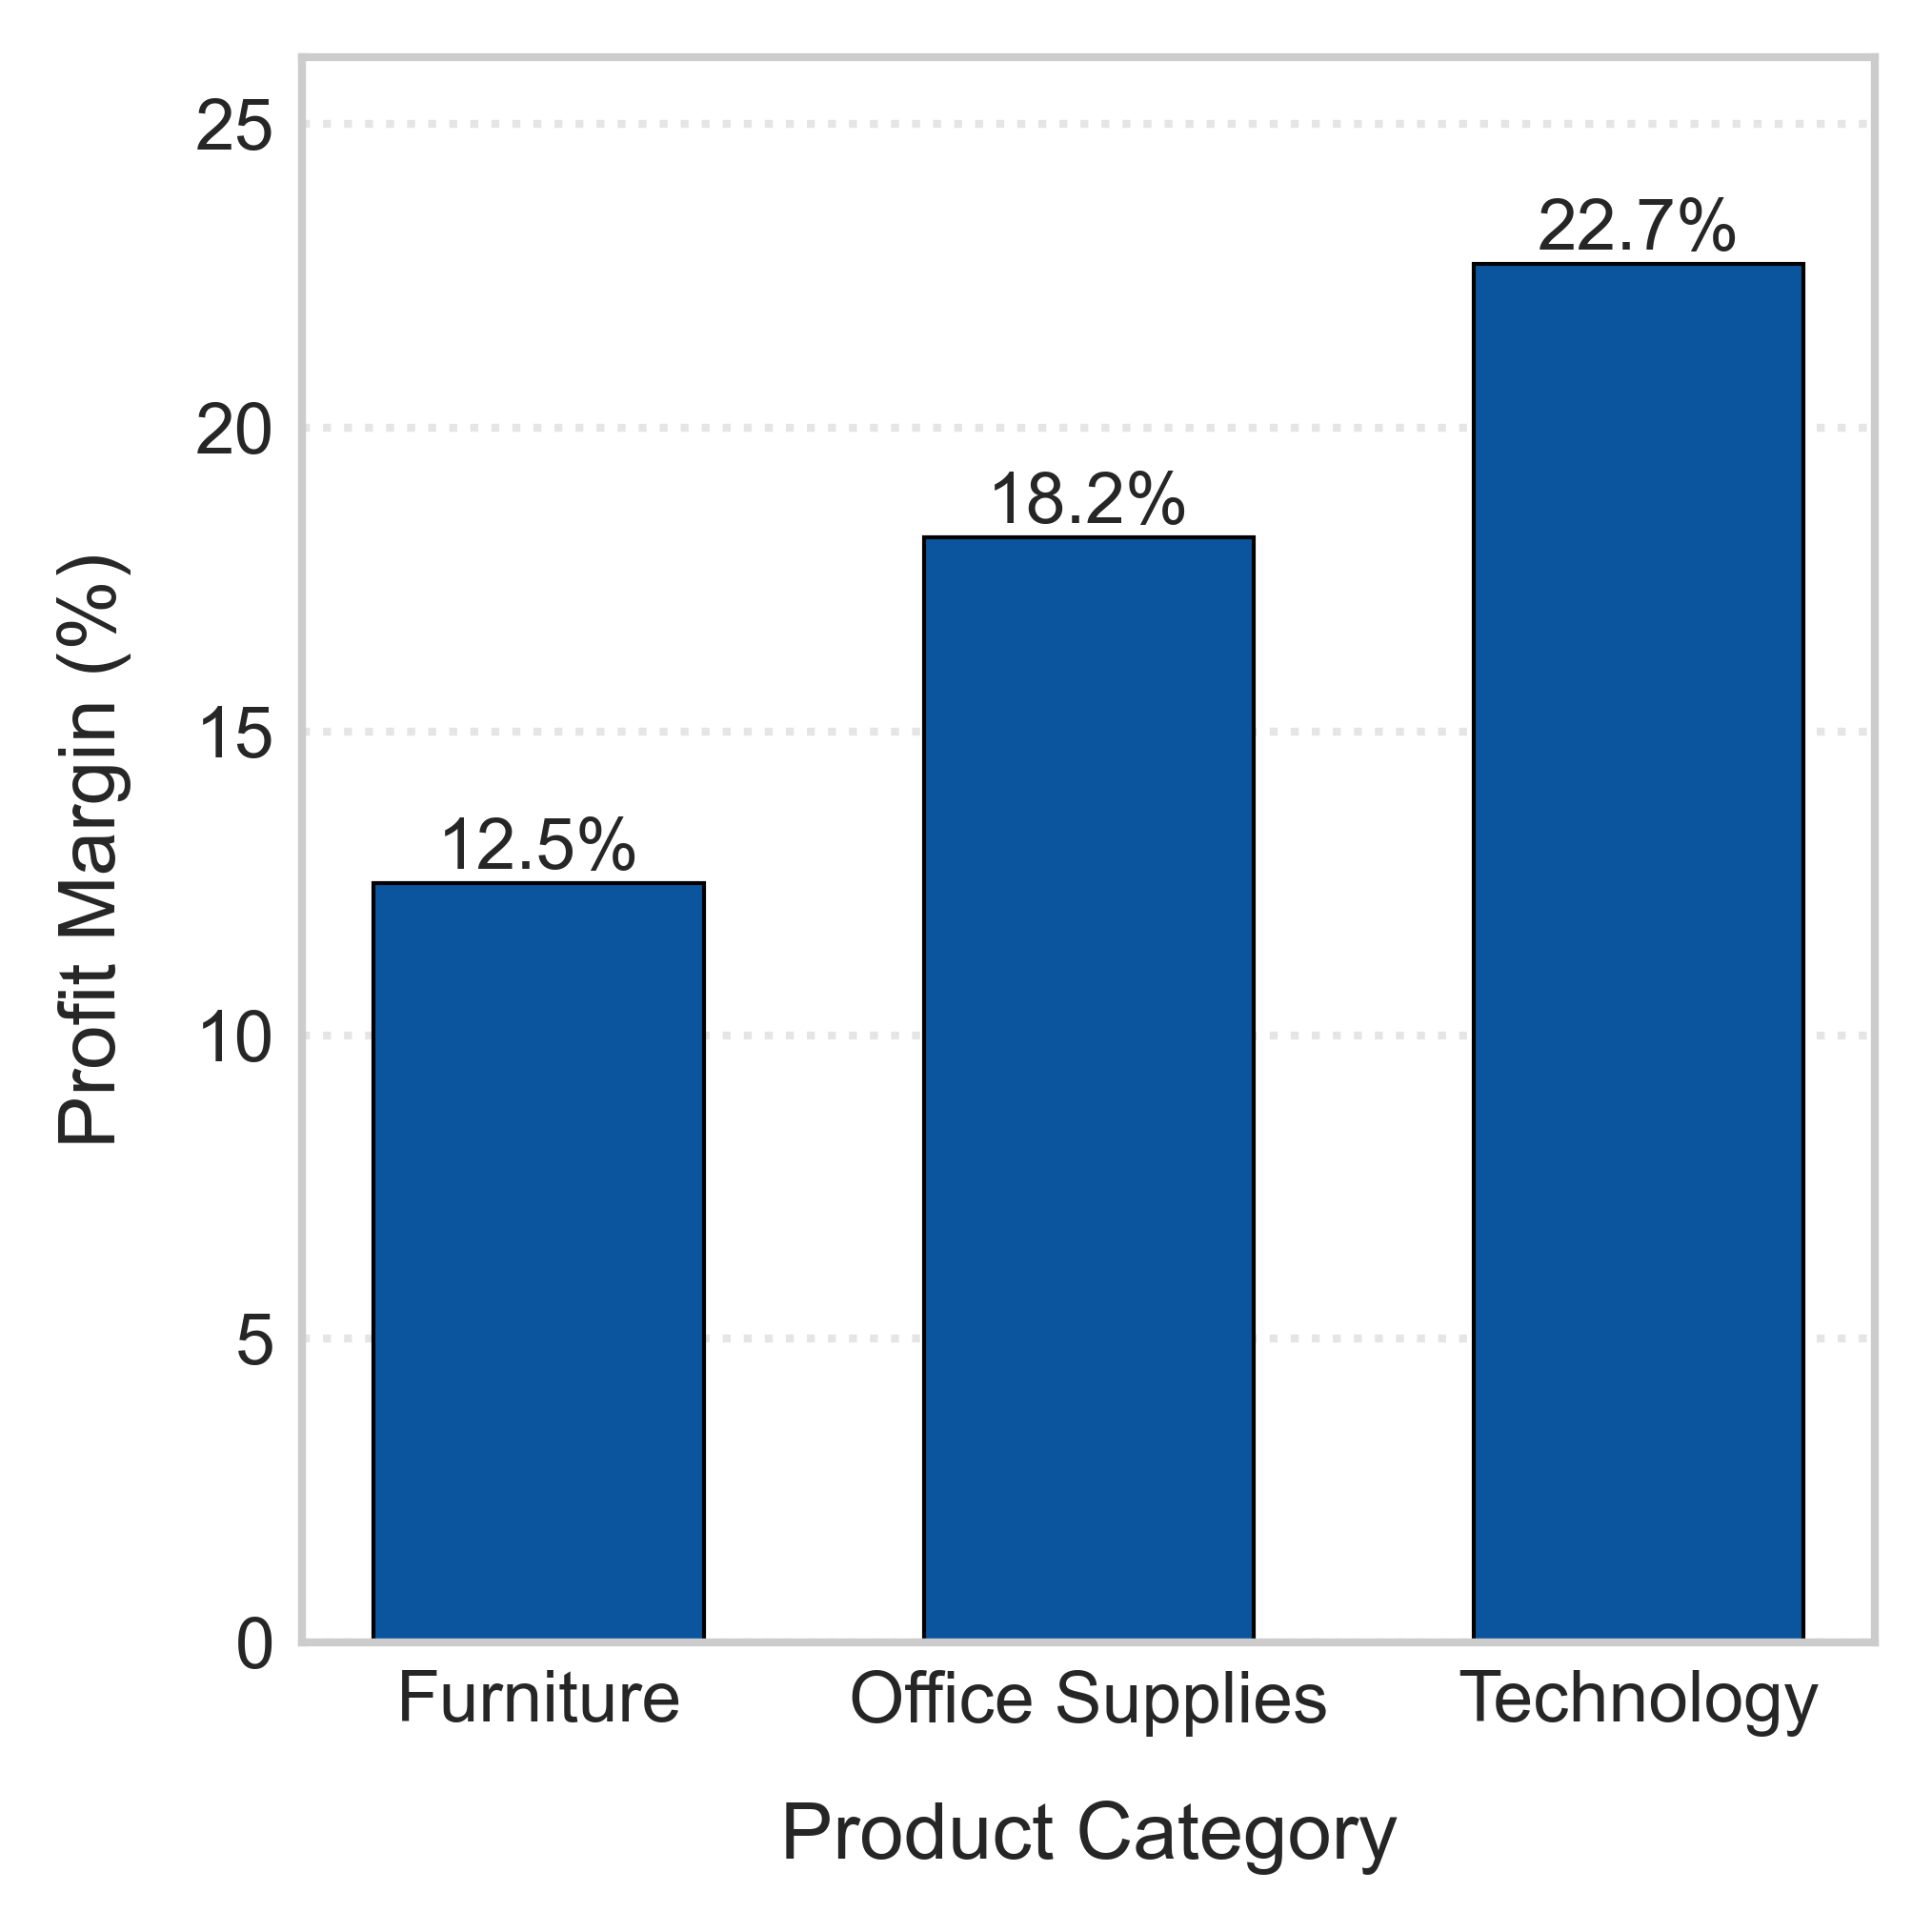

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# STYLE CONFIGURATION
plt.style.use('seaborn-v0_8-whitegrid')  # Clean white background with grid
sns.set_palette("Blues_r")  # Professional blue color gradient (reversed)

# Font configuration (Arial is standard for publications)
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'Arial',
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'figure.dpi': 600,  # High resolution
    'savefig.dpi': 600,
    'figure.autolayout': True  # Prevent label clipping
})

# DATA PREPARATION
# Sample data
categories = ['Furniture', 'Office Supplies', 'Technology']
profit_margins = np.array([12.5, 18.2, 22.7])  # Example values in percent

# FIGURE CREATION
fig, ax = plt.subplots(figsize=(3.54, 3.54))  # 9cm width (single column journal)

# Create bar plot with error bars (example values)
barplot = ax.bar(categories, profit_margins, 
                 width=0.6, edgecolor='black', linewidth=0.5)

# FORMATTING REFINEMENTS
# Axis labels
ax.set_xlabel('Product Category', labelpad=8)
ax.set_ylabel('Profit Margin (%)', labelpad=8)

# Title (optional for publications - often captions are used instead)
# ax.set_title('Profit Margins by Product Category', pad=12)

# Value labels on bars
for bar in barplot:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom',
            fontsize=9)

# Axis limits and ticks
ax.set_ylim(0, max(profit_margins)*1.15)  # 15% headroom
ax.yaxis.set_major_locator(plt.MaxNLocator(6))  # Clean number of ticks

# Grid customization
ax.yaxis.grid(True, linestyle=':', alpha=0.5)
ax.xaxis.grid(False)

# SAVING THE FIGURE
plt.savefig('profit_margins.tif', format='tiff',  # Preferred for journals
            dpi=600, bbox_inches='tight', 
            pil_kwargs={'compression': 'tiff_lzw'})

plt.savefig('profit_margins.pdf', format='pdf',  # Vector format
            bbox_inches='tight')

plt.savefig('profit_margins.png', format='png',  # For digital use
            dpi=600, bbox_inches='tight')

plt.show()